## Linear Regression with python
##### House Price Prediction on Boston Housing Dataset
You are a real state agent and you want to pridict the house price. it would be great if you can make some kind of automated system which product price of a house based on various input which is knowns as features.

# What is Linear Regression
It is a very powerfull technique and can be used to understand the factor that influence probablity. it can be used to forcaste sales in the comming month by analyzing the sales data for previous months. it can also be used gain various insights about costumer behaviour.

Data -> Regression -> Intelligence

Examples:-
1. Stock pridiction
2. Tweet Popularity
3. Housing dataset

- 1.1 Predict the price of  a stock(y) 
- 1.2 Depent on x = 
   - Recent history of stock price
   - News events
   - Related commodities

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
boston = load_boston()

c:\users\danish khan\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

In [4]:
# type(boston)
# boston.keys()
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [5]:
boston.feature_names
# boston.target

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
data = boston.data
# type(data)
data.shape

(506, 13)

###  Understand Boston data (usinga padas dataframe)

In [7]:
# ------usinga padas dataframe-----
data = pd.DataFrame(data = data, columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# data.info()
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### Data visualization
We will start by creating matrix that will allow us to visualize the pair-wise relationship and correlation between the features.

it is also quite useful to have quick overview of how the data is distuributed and weather it contains or not outlers


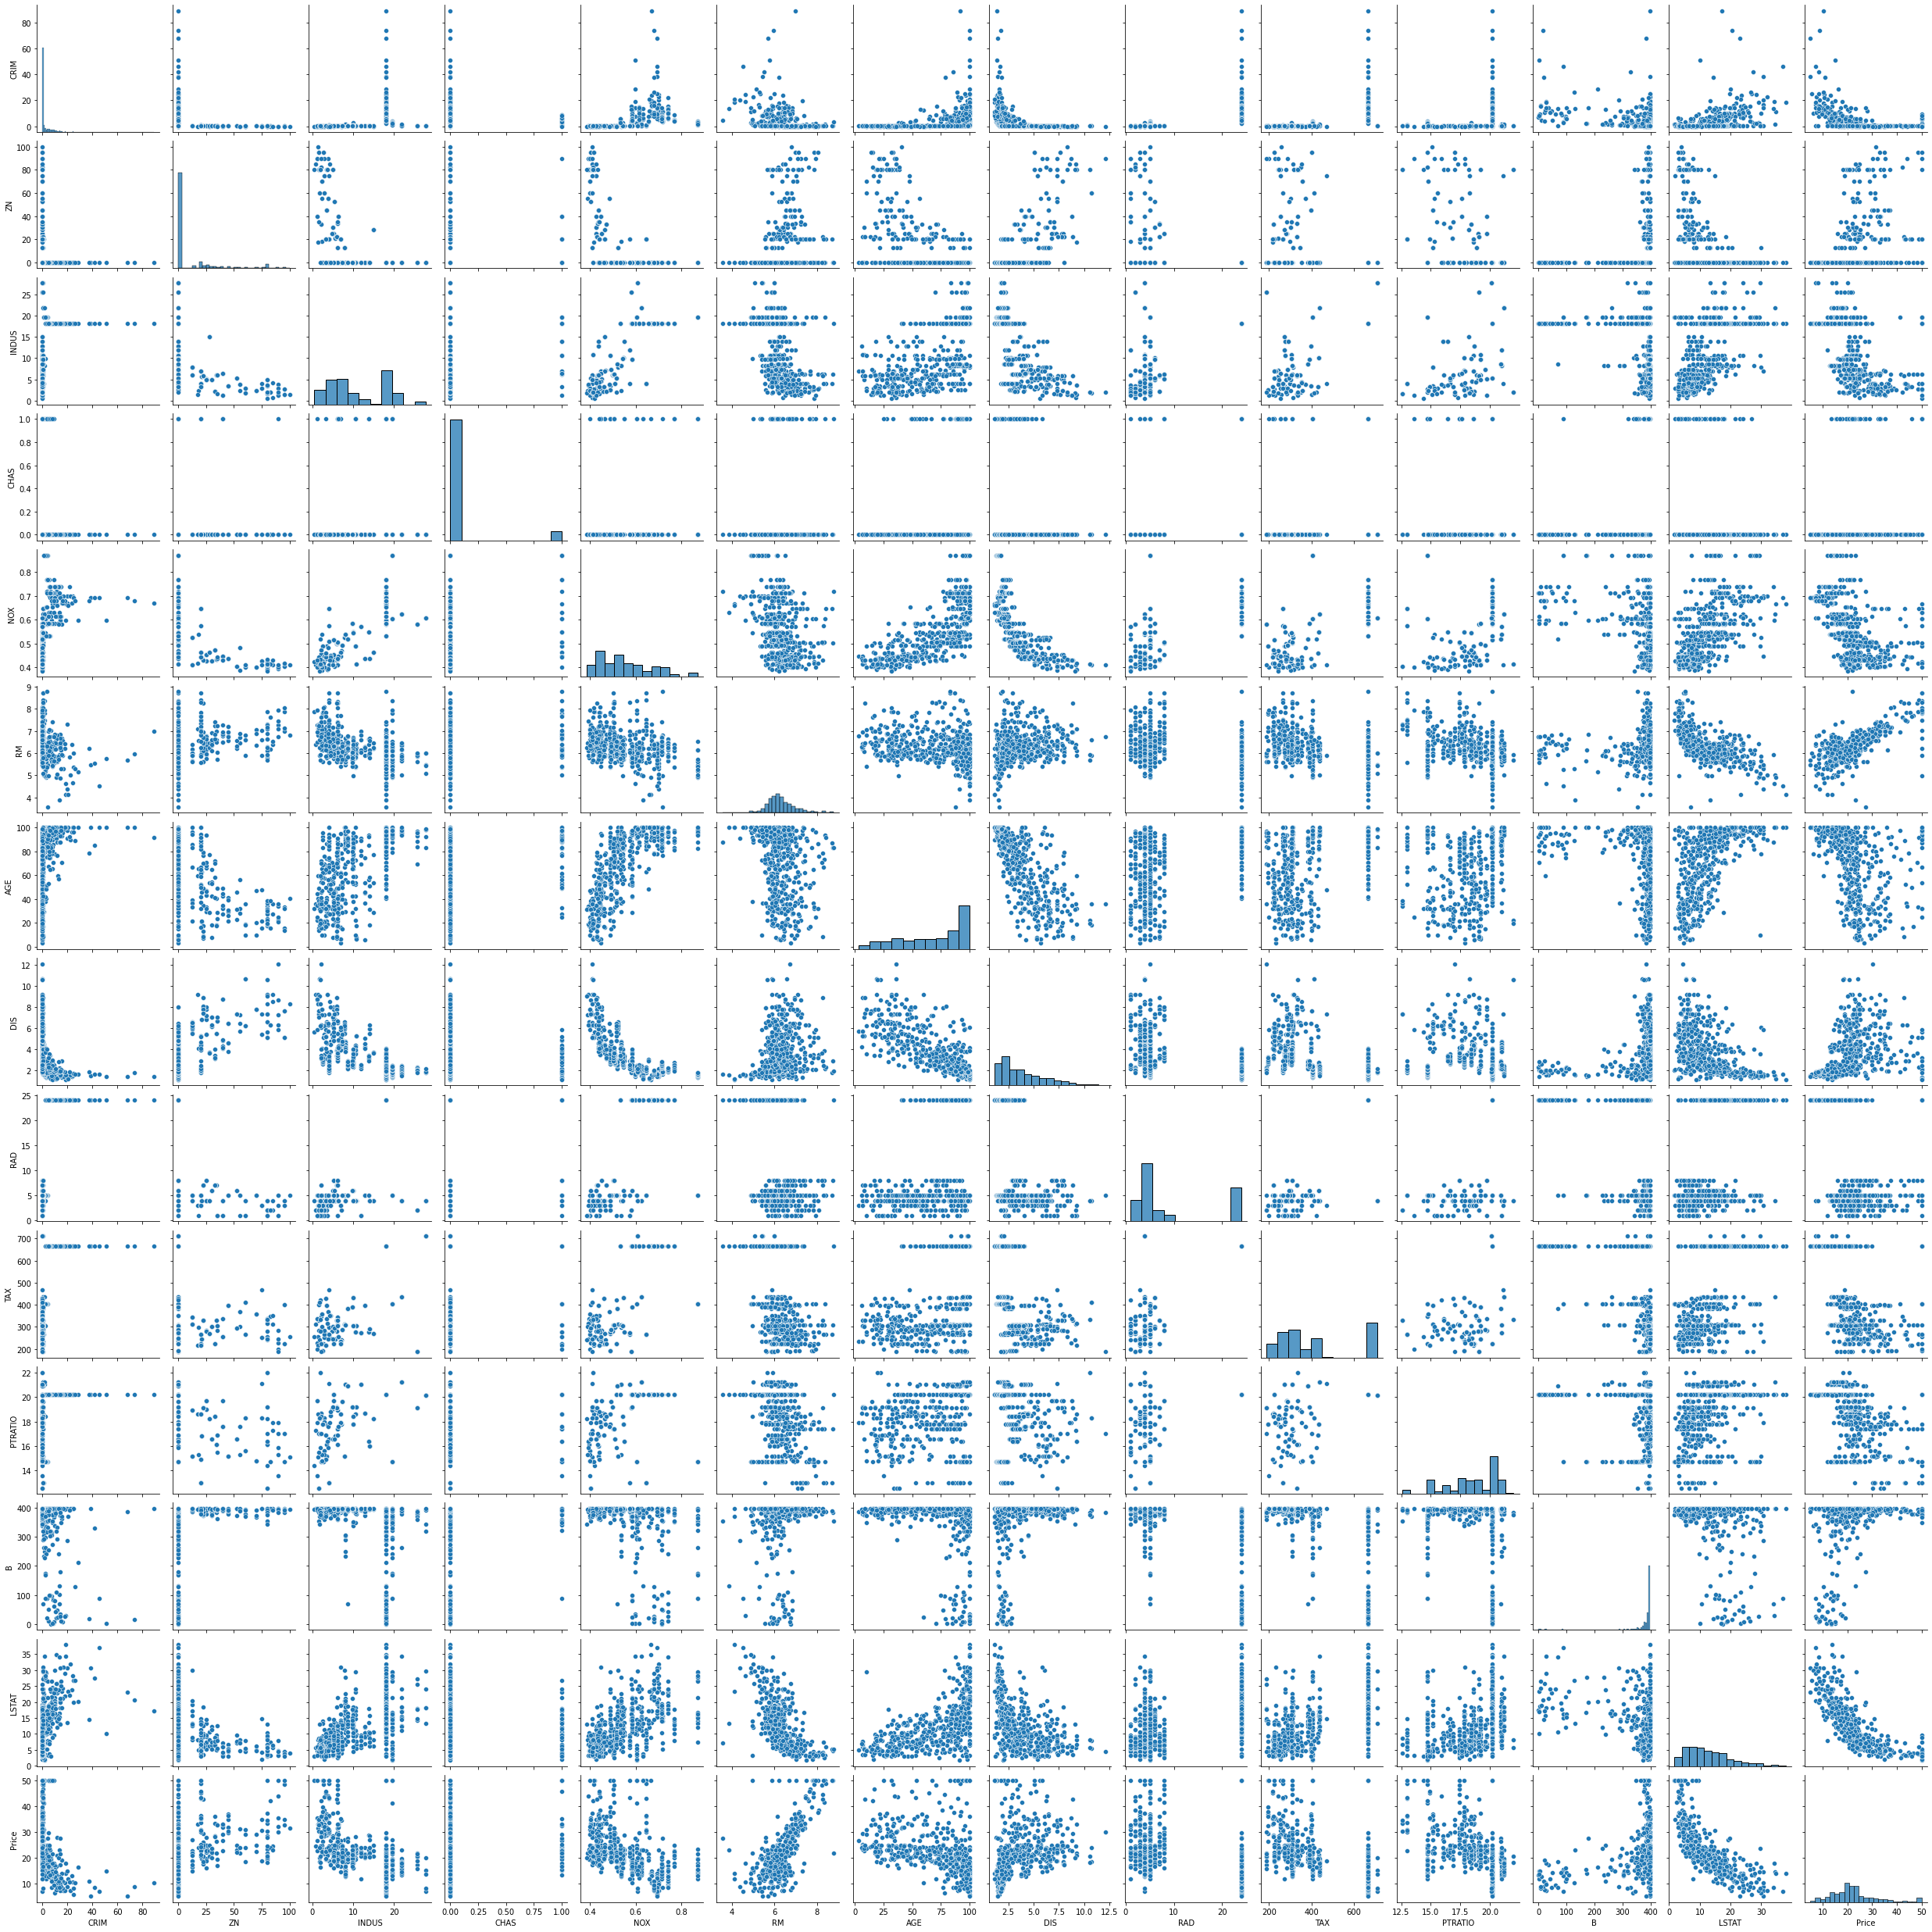

In [11]:
sns.pairplot(data)

c:\users\danish khan\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\danish khan\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\danish khan\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

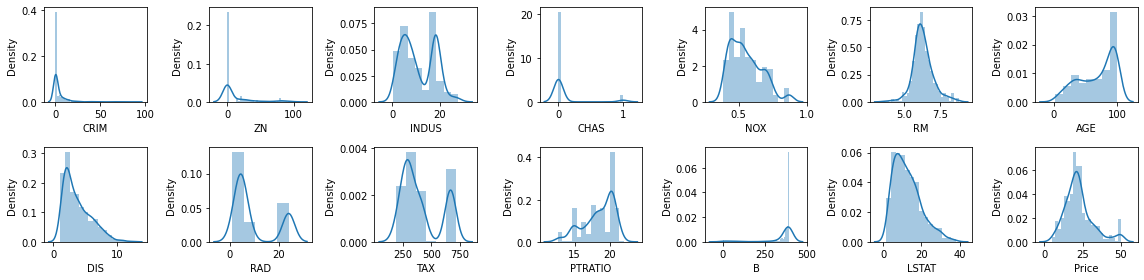

In [12]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows = rows, ncols= cols, figsize = (16, 4))

col = data.columns 
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1
        
plt.tight_layout()        

we are going to create now a correlation matrix to quantify and summarize the relationship between the variables.

This correlatin matrix is closely related with covariance matrix. in fact it is a rescaled version of the covariance matrix. computed from standardize features.

It is a square matrix(with the same number of columns and rows) that contains the Persons's r correlation cofficent

In [13]:
corrmat = data.corr()
corrmat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

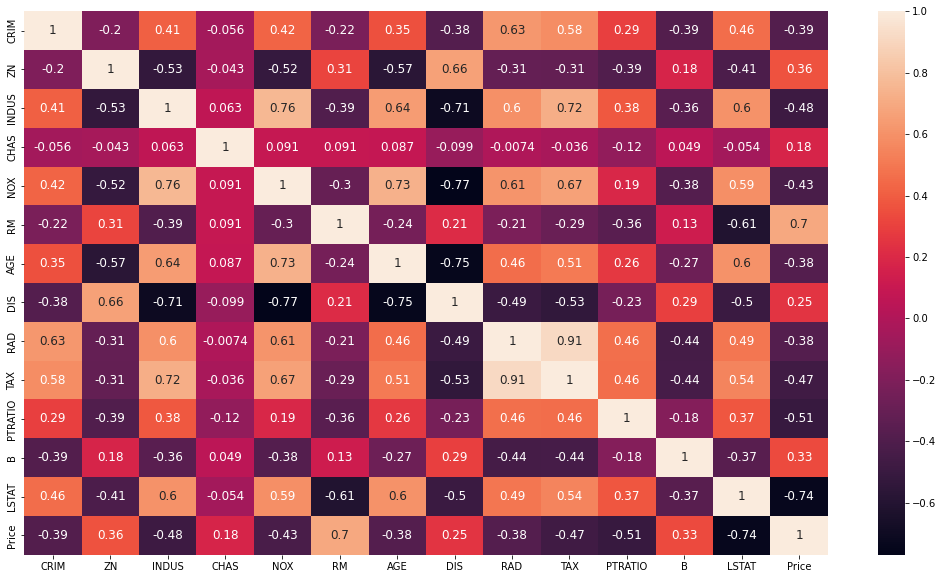

In [14]:
fig, ax = plt.subplots(figsize = (18,10))

sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

In [15]:
corrmat.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'], dtype=object)

In [16]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns= ['Corr value'])
    return df

In [17]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [18]:
corr_value.index.values

array(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype=object)

In [19]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


## Pairplot and Cormmat of correlated data

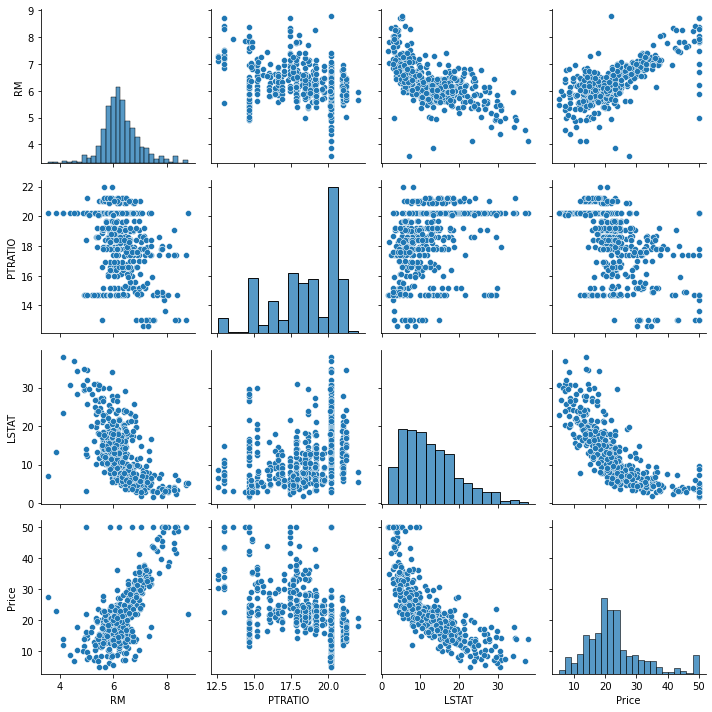

In [20]:
sns.pairplot(correlated_data)
plt.tight_layout()

<AxesSubplot:>

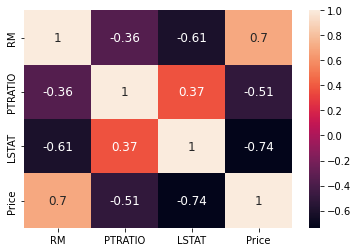

In [21]:
sns.heatmap(correlated_data.corr(), annot= True, annot_kws={'size':12})

## Shuffle and Split Data

we will take the Boston housing dataset and split the data into tainning and testing subsets. Typically the data is also suffled into a random order when creating the tainning  and creating subset to remove any bias in the ordering of the dataset.

In [50]:
x = correlated_data.drop(labels = ['Price'], axis = 1)
y =correlated_data['Price']
x.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [51]:
X_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [52]:
X_train.shape, x_test.shape

((404, 3), (102, 3))

## Lets tain the mode

In [53]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [54]:
y_pridict = model.predict(x_test)

In [55]:
df = pd.DataFrame(data = [y_pridict,y_test])
df.T

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2
...,...,...
97,28.271228,24.7
98,18.467419,14.1
99,18.558070,18.7
100,24.681964,28.1


## Define perfomance metrics

1. MAE(Mean Absolute Error) => is the easiest to understand because it's the average error

2. MSE(Mean Square Error) => is more popular than MAE because MSE "purshuses" larger errors which lends to be useful in the real world

3. RMSE is even more popular than MSE because RMSE is interpretable in the "Y" units.

##### All of these are loss functions because we want to minimize them

In [70]:
from sklearn.metrics import r2_score

correlated_data.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'Price'], dtype='object')

In [71]:
score = r2_score(y_test, y_pridict)
mae = mean_absolute_error(y_test, y_pridict)
mse = mean_squared_error(y_test, y_pridict)

print("r2 Score", score)
print("mae", mae)
print("mse", mse)

r2 Score 0.48816420156925067
mae 4.404434993909257
mse 41.67799012221683


#### Store Feature perfomance

In [72]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [73]:
def perfomance_metrics(features, th, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae  = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metrics_dataframe = pd.DataFrame(data = [total_features_name, total_features, selected_correlation_value, r2_scores, mae_value, mse_value],
                                     index = ['Features Name', 'Feature', 'corr_value', 'r2_score', 'MAE', 'MSE'])
    
    return metrics_dataframe.T

In [74]:
perfomance_metrics(correlated_data.columns.values, threshold, y_test, y_pridict)


,Features Name,Feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.404435,41.67799


### Regression plot of the features correlated with the House Price

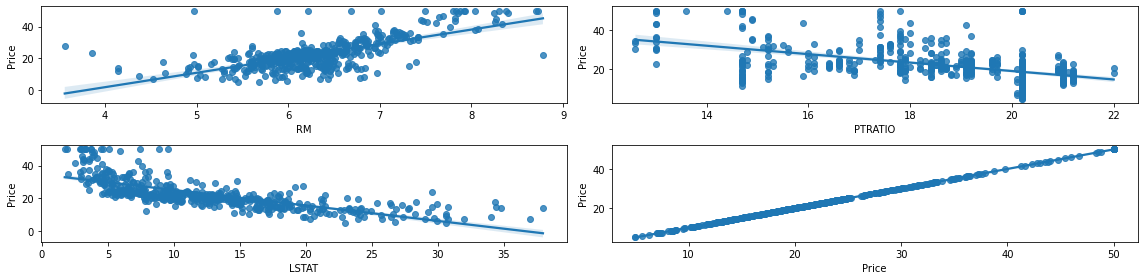

In [78]:
rows = 2
cols = 2
fig, ax = plt.subplots(nrows = rows, ncols= cols, figsize = (16, 4))

col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['Price'], ax = ax[i][j])
        index = index + 1
        
plt.tight_layout()    

## Let's find out other combination of colulmns to get better accuracy with >60% 

In [91]:
corrmat['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [92]:
threshold = 0.60
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value


,Corr value
RM,0.695360
LSTAT,-0.737663
Price,1.000000


In [93]:
correlated_data = data[corr_value.index]
correlated_data.head()

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [94]:
def get_y_pred(corr_data):
    x = corr_data.drop(labels = ['Price'], axis = 1)
    y = corr_data['Price']
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    return y_predict


In [95]:
y_pridict = get_y_pred(correlated_data)
perfomance_metrics(correlated_data.columns.values, threshold, y_test, y_pridict)


,Features Name,Feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.404435,41.67799
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.142445,37.383106
2,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.142445,37.383106


## Let's find out other combination of colulmns to get better accuracy with >70%

In [96]:
corrmat['Price']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Price      1.000000
Name: Price, dtype: float64

In [97]:
 threshold = 0.70
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value


,Corr value
LSTAT,-0.737663
Price,1.000000


In [98]:
correlated_data = data[corr_value.index]
correlated_data.head()

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [99]:
y_pridict = get_y_pred(correlated_data)
perfomance_metrics(correlated_data.columns.values, threshold, y_test, y_pridict)


,Features Name,Feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.404435,41.67799
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.142445,37.383106
2,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.142445,37.383106
3,['LSTAT' 'Price'],1,0.7,0.430957,4.864011,46.336305


## Let's go ahead and select only RM feature

In [101]:
correlated_data = data[['RM', 'Price']]
correlated_data.head()

,RM,Price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [102]:
y_pridict = get_y_pred(correlated_data)
perfomance_metrics(correlated_data.columns.values, threshold, y_test, y_pridict)


,Features Name,Feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.404435,41.67799
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.142445,37.383106
2,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.142445,37.383106
3,['LSTAT' 'Price'],1,0.7,0.430957,4.864011,46.336305
4,['RM' 'Price'],1,0.7,0.423944,4.324741,46.907352


## Let's find out other combination of colulmns to get better accuracy with >40%

In [103]:
 threshold = 0.40
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

,Corr value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [104]:
correlated_data = data[corr_value.index]
correlated_data.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,Price
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


In [105]:
y_pridict = get_y_pred(correlated_data)
perfomance_metrics(correlated_data.columns.values, threshold, y_test, y_pridict)


,Features Name,Feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.404435,41.67799
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.142445,37.383106
2,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.142445,37.383106
3,['LSTAT' 'Price'],1,0.7,0.430957,4.864011,46.336305
4,['RM' 'Price'],1,0.7,0.423944,4.324741,46.907352
5,['INDUS' 'NOX' 'RM' 'TAX' 'PTRATIO' 'LSTAT' 'P...,6,0.4,0.476203,4.394501,42.651942


## NORMALIZATION

In [109]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

c:\users\danish khan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [111]:
y_pridict = model.predict(x_test)
r2_score(y_test, y_pridict)

0.4881642015692508

# Defining perfomance metrics

#### Plotting Learning graph

In [115]:
from sklearn.model_selection import learning_curve, ShuffleSplit

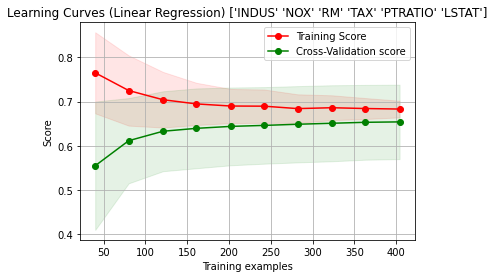

In [125]:
def plot_learning_curve(estimator, title, x, y, yline = None, cv = None, n_jobs = None, train_sizes = np.linspace(.1,1.0,10) ):
    
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha = 0.1, color = "g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color = "r", label = "Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color = "g", label = "Cross-Validation score")
    
    
    plt.legend(loc = "best")
    return plt
    
x = correlated_data.drop(labels = ["Price"], axis = 1)   
y = correlated_data["Price"]

title  = "Learning Curves (Linear Regression) " + str(x.columns.values)

cv = ShuffleSplit(n_splits = 100, test_size = 0.2, random_state = 0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, x, y, yline=(0.7, 1.05), cv=cv, n_jobs=-1)

plt.show()